# JobIndex
### https://www.jobindex.dk

**Hente data ned om jobopslag med python og et andre valgfrige kodesprog**


In [44]:
#defining languages of interest (try yourself)
languages = ["python", "javascript", "java", ".net"]

In [45]:
import requests

url = "https://www.jobindex.dk/jobsoegning?q="

content_list = [requests.get(f"{url}{language}") for language in languages]

**Lav et plot der viser hvor mange jobopslag der er pr region mellem python og det andet kodesprog som blev valgt**


In [46]:
import bs4
import re

def region_amount_list(l):
    res = []
    for content in l:
        #loading content into bs4
        soup = bs4.BeautifulSoup(content.text, 'html.parser')

        #finding everything inside #id areas
        areas = soup.findAll("div", {"id":"areas"})

        #making a regex object for retrieving region and amount groups
        region_amount = re.compile(r" *([a-zA-ZæøåÆØÅ ]+).*>(\d+)")

        #using the object to append the 2 groups in a dict
        regions = dict(region_amount.findall(str(areas)))
        
        #removing the total/"Danmark"
        del regions["Danmark"]
        
        #converting string values into ints
        regions = {k : int(v) for k,v in regions.items()}
        
        res.append(regions)
    return res

Plotting

<IPython.core.display.Javascript object>


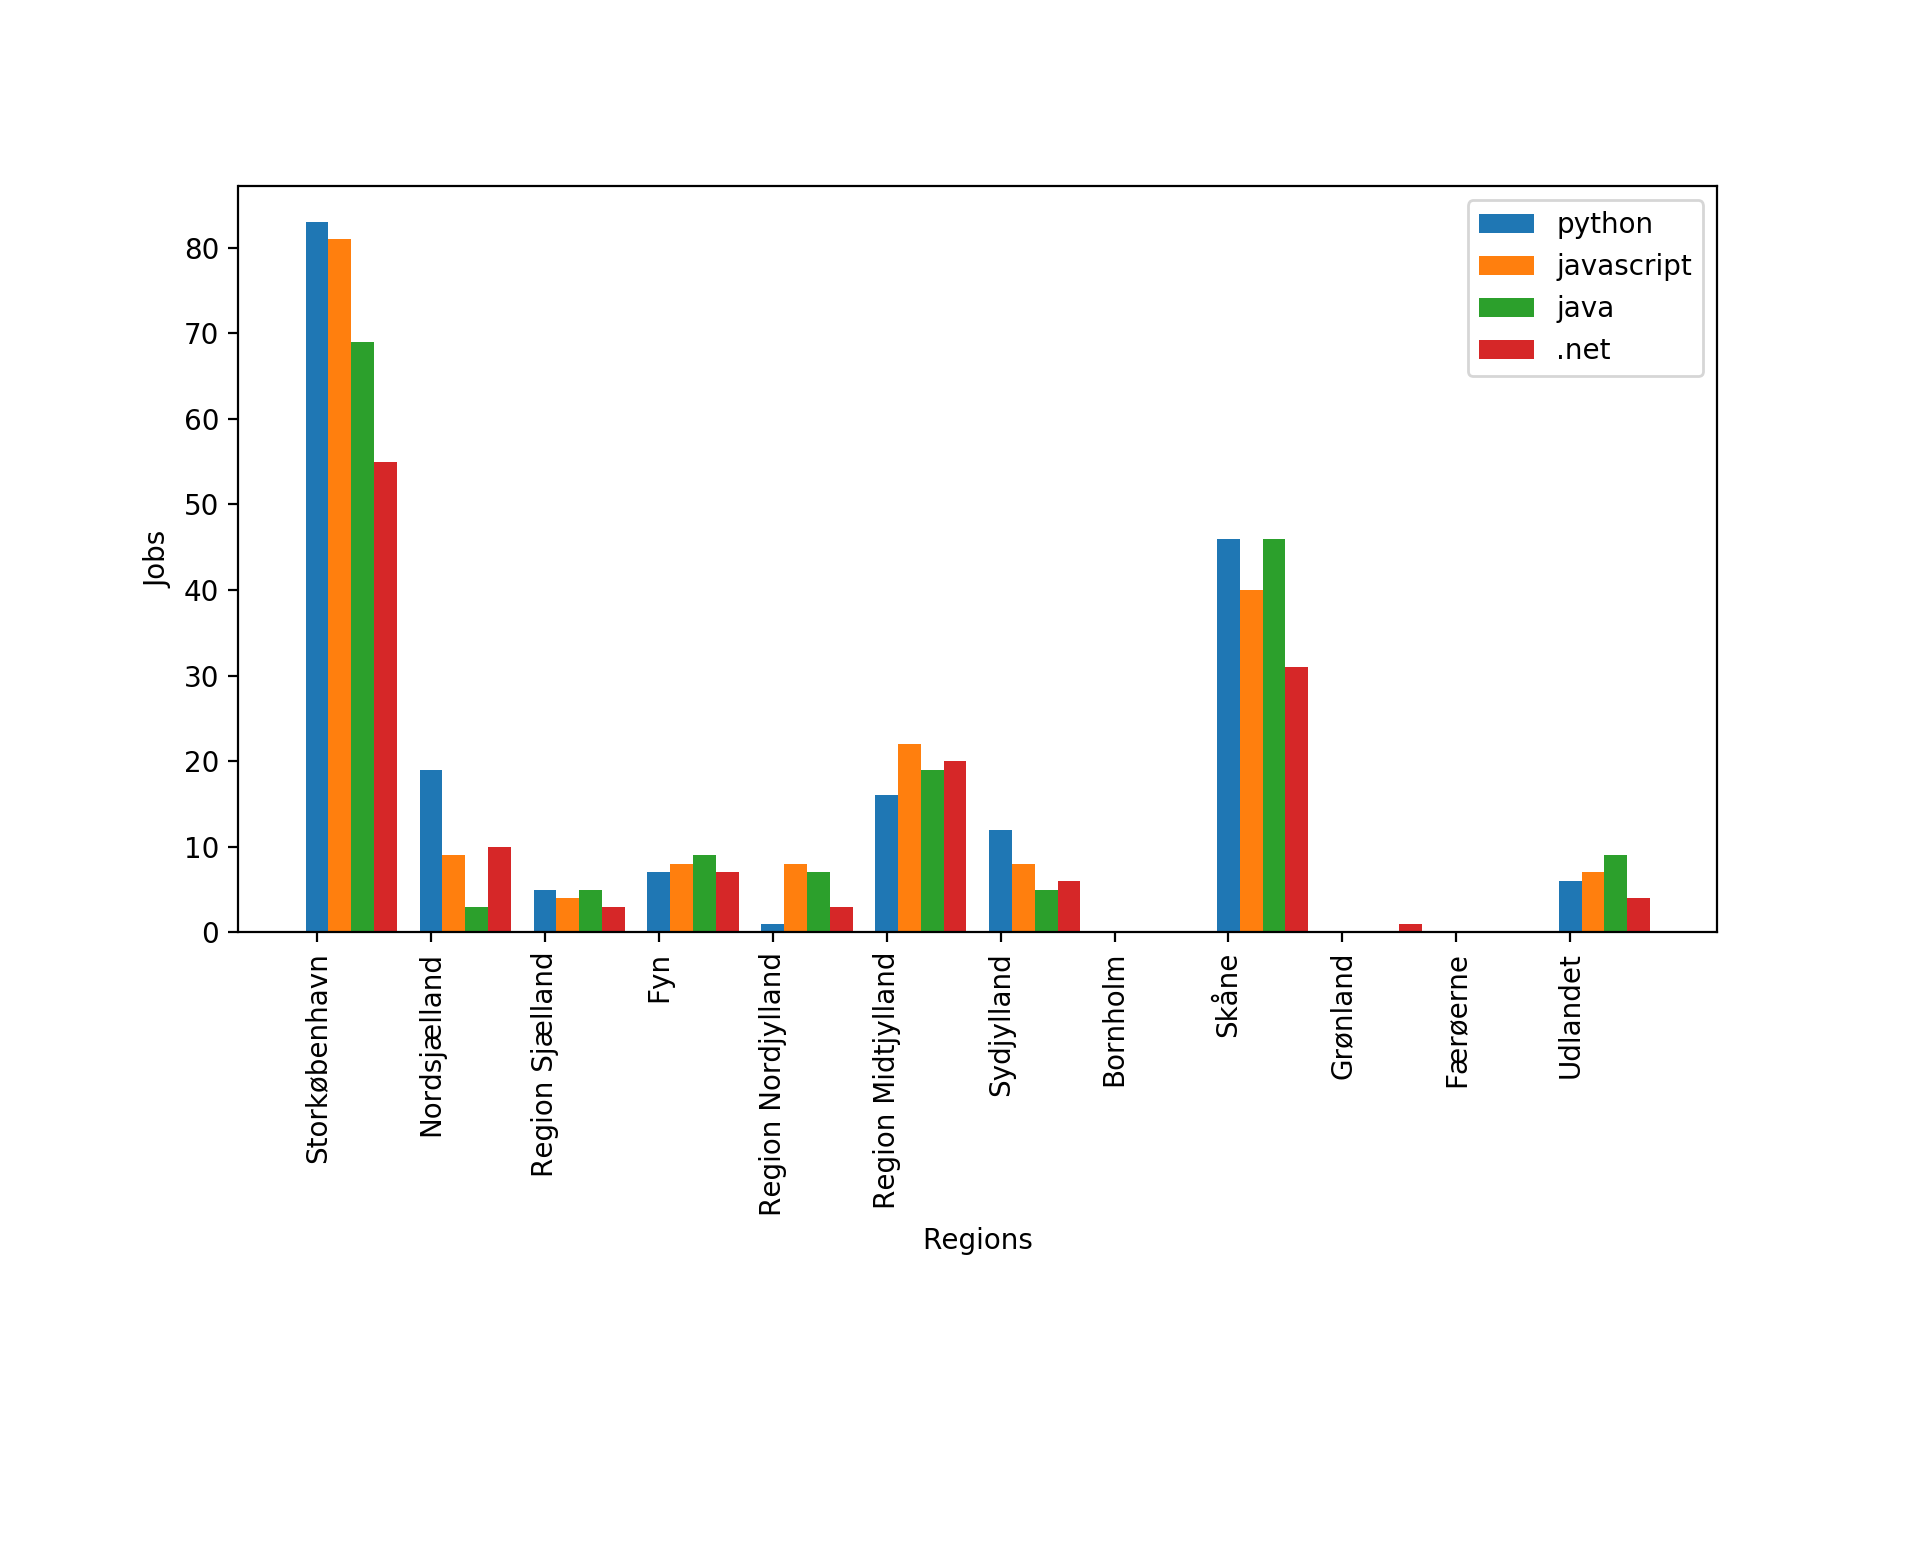

In [47]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

region_amounts = region_amount_list(content_list)

fig, ax = plt.subplots()
width = (0.8/len(languages))
plots = []
ind = np.arange(len(region_amounts[0]))

for k, language in enumerate(languages):
    region_amount = region_amounts[k]
    
    bar_plot = ax.bar(ind + (k * width), region_amount.values(),width)
    
    plots.append(bar_plot)
    
ax.legend(plots, languages)
ax.set_xlabel("Regions")
ax.set_ylabel("Jobs")
labels = list(region_amounts[0].keys())
plt.xticks(list(ind),labels)
plt.xticks(rotation="90")
plt.subplots_adjust(bottom=0.4)